In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import torchvision
import cv2

import matplotlib.pyplot as plt

/Users/beppe/opt/anaconda3/envs/ptc/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: dlopen(/Users/beppe/opt/anaconda3/envs/ptc/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: /Users/beppe/opt/anaconda3/envs/ptc/lib/python3.9/site-packages/torchvision/image.so
  Expected in: /Users/beppe/opt/anaconda3/envs/ptc/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


# Anchor Boxes

In [2]:
def draw_grid(input, line_color=(0, 255, 0), thickness=1, type_= cv2.LINE_AA, pxstep=50):
    img = input.copy()
        
    cv2.rectangle(img,(0,0),(img.shape[0]-1,img.shape[1]-1),line_color,thickness)
    
    x = 0
    y = 0
    while x < img.shape[1]:
        cv2.line(img, (x, 0), (x, img.shape[0]), color=line_color, lineType=type_, thickness=thickness)
        x += pxstep

    while y < img.shape[0]:
        cv2.line(img, (0, y), (img.shape[1], y), color=line_color, lineType=type_, thickness=thickness)
        y += pxstep
        
    return img

## Immagine di esempio

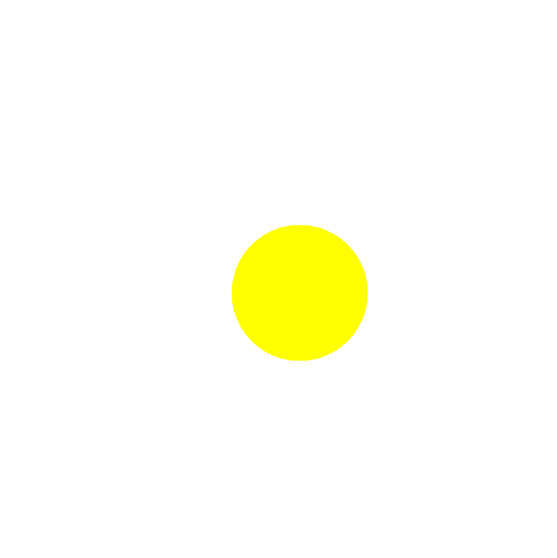

In [3]:
import numpy as np
import cv2


img = np.ones((800, 800,3),dtype = 'uint8')*255

# [y1, x1, y2, x2] format
bbox = [250,550,550,750]

x, y = 430,420
r = 100


cv2.circle(img, (x,y), r, (255, 255, 0),cv2.FILLED)


plt.figure(figsize=(10,10))

plt.imshow(img)
plt.axis('off')
plt.show()


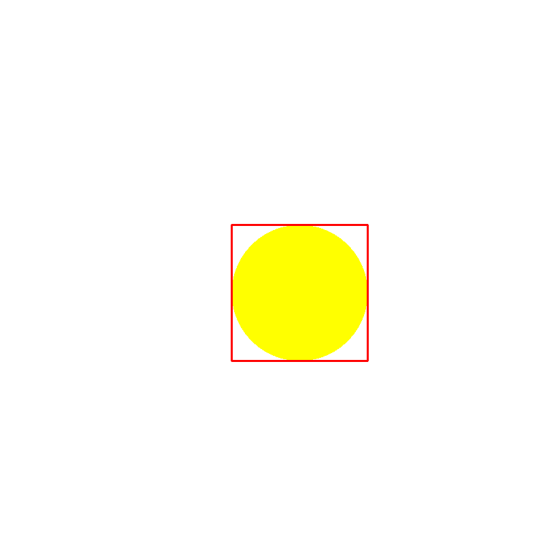

In [4]:
cv2.rectangle(img, (x-r,y-r), (x+r, y+r), (255, 0, 0),thickness=2)



plt.figure(figsize=(10,10))

plt.imshow(img)
plt.axis('off')
plt.show()



La griglia rappresenta il livello di downsample ottenuto calcolando le feature maps

In [5]:
model_ft = torchvision.models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/beppe/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [7]:
model_ft

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
model_ft = model_ft.features[:-1]

In [9]:
model_ft

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [10]:
input = torch.randn((1,3,800,800))

output = model_ft(input)


/Users/beppe/opt/anaconda3/envs/ptc/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /tmp/pip-req-build-accccgfm/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [11]:
output.shape

torch.Size([1, 512, 50, 50])

In [11]:
output[0,0,0,0]

tensor(0., grad_fn=<SelectBackward>)

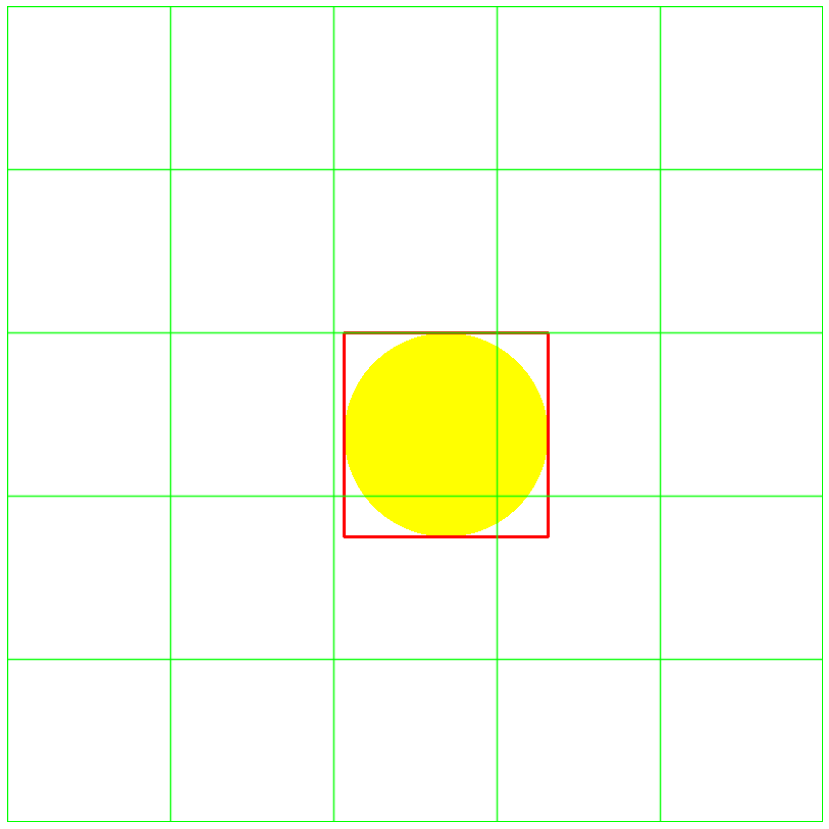

In [28]:
plt.figure(figsize=(15,15))


cell_size = 160

img_grid = draw_grid(img,pxstep=cell_size)

plt.imshow(img_grid)
plt.axis('off')
plt.show()

## Visualizzare gli anchor boxes

Generiamo la griglia degli anchor points

In [14]:
def generate_anchors(img, sub_sample, ratios=[0.5, 1, 2], anchor_scales=[0.5, 1, 2]):
    fe_size = [img.shape[0] // sub_sample, img.shape[1] // sub_sample]

    ctr_x = np.arange(sub_sample, (fe_size[0] + 1) * sub_sample, sub_sample).astype('int')
    ctr_y = np.arange(sub_sample, (fe_size[1] + 1) * sub_sample, sub_sample).astype('int')

    ctr = np.zeros((len(ctr_x) * len(ctr_y), 2)).astype('int')
        
    index = 0
    for x in range(len(ctr_x)):
        for y in range(len(ctr_y)):
            ctr[index, 1] = ctr_x[x] - (sub_sample//2)
            ctr[index, 0] = ctr_y[y] - (sub_sample//2)

            index += 1

    n_of_anchors = len(ratios) * len(anchor_scales)
    anchors = np.zeros(((fe_size[0] * fe_size[1] * n_of_anchors), 4)).astype('int')

    index = 0

    for c_id, c in enumerate(ctr):
        ctr_y, ctr_x = c
        for i in range(len(ratios)):
            for j in range(len(anchor_scales)):
                h = sub_sample * anchor_scales[j] * np.sqrt(ratios[i])
                w = sub_sample * anchor_scales[j] * np.sqrt(1. / ratios[i])
                anchors[index, 0] = ctr_y - h / 2.
                anchors[index, 1] = ctr_x - w / 2.
                anchors[index, 2] = ctr_y + h / 2.
                anchors[index, 3] = ctr_x + w / 2.
                index += 1

    index_inside = np.where(
        (anchors[:, 0] >= 0) &
        (anchors[:, 1] >= 0) &
        (anchors[:, 2] <= 800) &
        (anchors[:, 3] <= 800)
    )[0]

    return ctr,anchors[index_inside]

In [15]:
ctr,anchors = generate_anchors(img_grid,cell_size,anchor_scales=[1,2,4])

In [16]:
anchors

array([[  0,   0,  40,  40],
       [ 40,   0,  80,  40],
       [ 31,   5,  88,  34],
       ...,
       [720, 760, 760, 800],
       [711, 765, 768, 794],
       [760, 760, 800, 800]])

In [17]:
def draw_anchors(image,ctr,anchors, point_col = (0, 0, 0), anch_col = (150, 150, 150),thickness=1, type_= cv2.LINE_AA):
    im = image.copy()
    
    if ctr is not None:
        for c in ctr:
            cv2.circle(im, (c[0],c[1]), 0, point_col, thickness=5)
        
        
    for a in anchors:
        cv2.rectangle(im,(a[0], a[1]), (a[2], a[3]),anch_col,thickness)
    
    return im

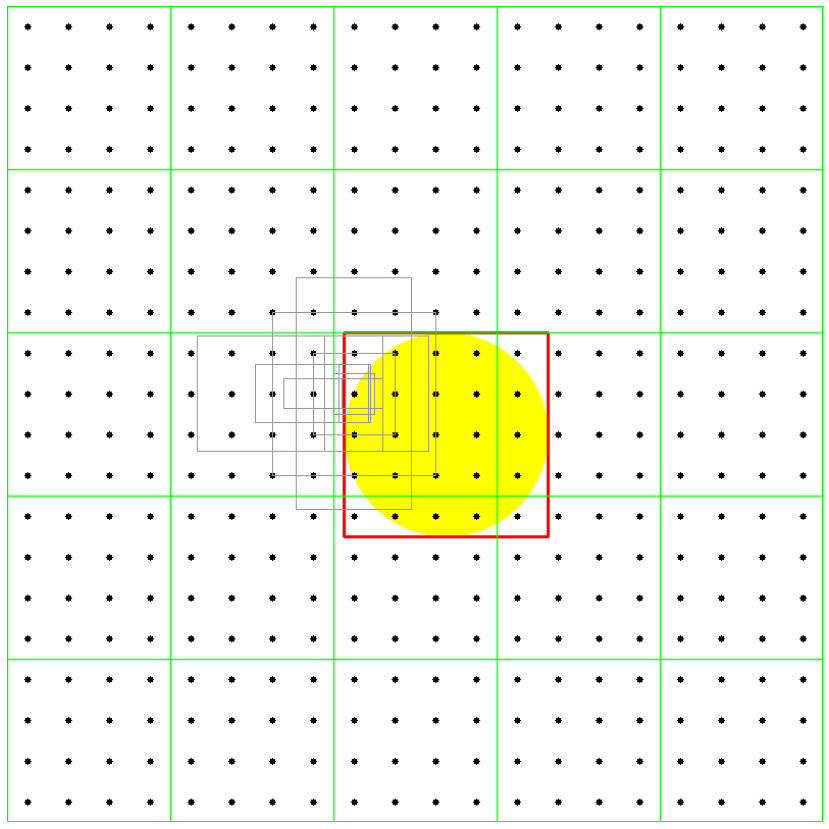

In [29]:
plt.figure(figsize=(15,15))


cell_size = 160

img_anch = draw_anchors(img_grid,ctr,anchors[1325:1335])#[312:321])
#img_anch = draw_anchors(img_grid,ctr,anchors)


plt.imshow(img_anch)
plt.axis('off')
plt.show()

## Region Proposal Network

In [18]:
class RegioProposalNetwork(nn.Module):
    def __init__(self,in_channels = 512, mid_channels = 512, n_anchor = 9):
        super(RegioProposalNetwork, self).__init__()
        conv1 = nn.Conv2d(in_channels, mid_channels, 3, 1, 1)
        nn.init.normal(conv1.weight, mean=0, std=0.001)
        nn.init.zeros(conv1.bias)
            
        reg_layer = nn.Conv2d(mid_channels, n_anchor *4, 1, 1, 0)
        nn.init.normal(reg_layer.weight, mean=0, std=0.001)
        nn.init.zeros(reg_layer.bias)

        cls_layer = nn.Conv2d(mid_channels, n_anchor *2, 1, 1, 0) 
        nn.init.normal(cls_layer.weight, mean=0, std=0.001)
        nn.init.zeros(cls_layer.bias)

    
    def forward(self, x):
        x = conv1(x)
        pred_anchor_locs = reg_layer(x)
        pred_cls_scores = cls_layer(x)
        
        pred_anchor_locs = pred_anchor_locs.permute(0, 2, 3, 1).contiguous().view(1, -1, 4)
        pred_cls_scores = pred_cls_scores.permute(0, 2, 3, 1).contiguous()

        pred_cls_scores  = pred_cls_scores.view(pred_cls_scores.shape[0], -1, 2)
        
        return pred_anchor_locs, pred_cls_scores
        
        

## RetinaNet

Riferimento su [github](https://github.com/kuangliu/pytorch-retinanet)

In [19]:
pt = np.linspace(0,1,2000)
pt = pt[1:]

FL= lambda gamma: -1*(1-pt)**gamma*np.log(pt)



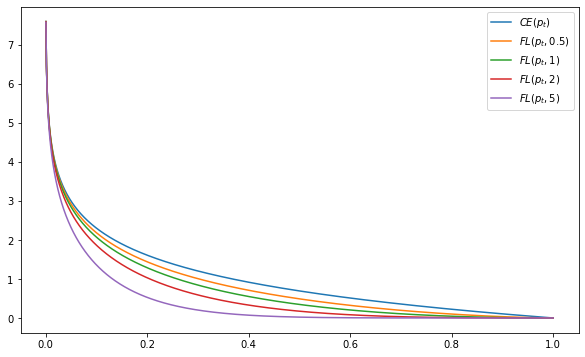

In [20]:

plt.figure(figsize=(10,6))




plt.plot(pt,FL(0),label=r'$CE(p_t)$')
plt.plot(pt,FL(0.5),label=r'$FL(p_t,0.5)$')
plt.plot(pt,FL(1),label=r'$FL(p_t,1)$')
plt.plot(pt,FL(2),label=r'$FL(p_t,2)$')
plt.plot(pt,FL(5),label=r'$FL(p_t,5)$')
plt.legend()

plt.show()
